###  EDA_Dial-BAf.ipynb

## Introducción

### Contexto General
Los datos analizados en este notebook provienen del **Ente Nacional de Comunicaciones (ENACOM)** de Argentina, el organismo 
regulador de las telecomunicaciones en el país. Esta información permite evaluar el estado y la evolución del acceso a 
internet en Argentina.

### Descripción del Conjunto de Datos
Este análisis se centra en la hoja de datos **"Accesos dial-up y Banda Ancha Fija (BAf)."**, que proporciona información 
detallada sobre el estado de los accesos a internet en el país.

### Objetivo del Análisis
El propósito de este análisis es **explorar y visualizar los datos** para identificar tendencias, patrones y posibles 
anomalías en la información. Se aplicarán métodos de **Análisis Exploratorio de Datos (EDA)** para obtener insights 
valiosos.

In [38]:

# 1 Cargar el archivo y normalizar los nombres

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Reemplaza el nombre del archivo con el que quieres evaluar y modificar
nombre_archivo = "Dial-BAf.csv"

# Ruta completa al archivo
ruta_completa = os.path.join(r"C:\Users\USUARIO\OneDrive - Secretaria de Educacion del Distrito\Escritorio\SOYhENRY\PI_21\PI_2_DA_corregido\data_internet_ind", nombre_archivo)

# Verificar si el archivo existe antes de cargarlo
if os.path.exists(ruta_completa):
	# Cargar el archivo CSV
	df = pd.read_csv(ruta_completa)
	print("Archivo cargado exitosamente.")
else:
	print(f"Error: El archivo '{ruta_completa}' no existe.")



Archivo cargado exitosamente.


In [39]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1992 entries, 0 to 1991
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Año               1992 non-null   int64  
 1   Trimestre         1992 non-null   int64  
 2   Provincia         1992 non-null   object 
 3   Banda ancha fija  1992 non-null   int64  
 4   Dial up           1988 non-null   float64
 5   Total             1992 non-null   int64  
 6   Trimestre_Label   1992 non-null   object 
dtypes: float64(1), int64(4), object(2)
memory usage: 109.1+ KB
None


In [40]:
# Extraer el nombre de las columnas
nombres_columnas = df.columns.tolist()
print("Nombres de las columnas:")
print(nombres_columnas)

Nombres de las columnas:
['Año', 'Trimestre', 'Provincia', 'Banda ancha fija', 'Dial up', 'Total', 'Trimestre_Label']


In [41]:
print(df.head())

    Año  Trimestre     Provincia  Banda ancha fija  Dial up    Total  \
0  2024          2  BUENOS AIRES           4983480   5900.0  4989380   
1  2024          2          CABA           1461549   2050.0  1463599   
2  2024          2     CATAMARCA             75073      1.0    75074   
3  2024          2         CHACO            147087      5.0   147092   
4  2024          2        CHUBUT            173366    857.0   174223   

  Trimestre_Label  
0              Q2  
1              Q2  
2              Q2  
3              Q2  
4              Q2  


In [42]:
df['Provincia'] = df['Provincia'].str.upper()
print(df['Provincia'].head())

0    BUENOS AIRES
1            CABA
2       CATAMARCA
3           CHACO
4          CHUBUT
Name: Provincia, dtype: object


In [43]:
# Normalizar los nombres de columnas si existen
columnas_a_normalizar = ['Provincia', 'Partido', 'Localidad']
for columna in columnas_a_normalizar:
    if columna in df.columns:
        df[columna] = df[columna].str.strip().str.upper()


In [44]:
# 2: Reemplazar variaciones específicas

# Reemplazar variaciones específicas en 'Provincia' si existe
if 'Provincia' in df.columns:
    df['Provincia'] = df['Provincia'].replace({
        'BS AS': 'BUENOS AIRES',
        'CIUDAD AUTONOMA DE BUENOS AIRES': 'CABA',
        'CAPITAL FEDERAL': 'CABA',
        'CORDOBA': 'CÓRDOBA',
        'ENTRE RIOS': 'ENTRE RÍOS',
        'RIO NEGRO': 'RÍO NEGRO',
        'TUCUMAN': 'TUCUMÁN',
        'NEUQUEN': 'NEUQUÉN'
        # Agrega más reemplazos según sea necesario y dependiente del archivo
    })
    print("\nValores únicos en 'Provincia' después de los reemplazos:")
    print(df['Provincia'].unique())
else:
    print("La columna 'Provincia' no existe en el DataFrame.")

# Reemplazar valores en 'Partido' si existe
if 'Partido' in df.columns:
    df['Partido'] = df['Partido'].replace({
        'SAN ISIDRO': 'SAN ISIDRO',
        'TIGRE': 'TIGRE'
        # Agrega más reemplazos según sea necesario
    })
    print("\nValores únicos en 'Partido' después de los reemplazos:")
    print(df['Partido'].unique())
else:
    print("La columna 'Partido' no existe en el DataFrame.")

# Reemplazar valores en 'Localidad' si existe
if 'Localidad' in df.columns:
    df['Localidad'] = df['Localidad'].replace({
        'VICENTE LOPEZ': 'VICENTE LÓPEZ',
        'SAN FERNANDO': 'SAN FERNANDO'
        # Agrega más reemplazos según sea necesario
    })
    print("\nValores únicos en 'Localidad' después de los reemplazos:")
    print(df['Localidad'].unique())
else:
    print("La columna 'Localidad' no existe en el DataFrame.")



Valores únicos en 'Provincia' después de los reemplazos:
['BUENOS AIRES' 'CABA' 'CATAMARCA' 'CHACO' 'CHUBUT' 'CÓRDOBA' 'CORRIENTES'
 'ENTRE RÍOS' 'FORMOSA' 'JUJUY' 'LA PAMPA' 'LA RIOJA' 'MENDOZA' 'MISIONES'
 'NEUQUÉN' 'RÍO NEGRO' 'SALTA' 'SAN JUAN' 'SAN LUIS' 'SANTA CRUZ'
 'SANTA FE' 'SANTIAGO DEL ESTERO' 'TIERRA DEL FUEGO' 'TUCUMÁN']
La columna 'Partido' no existe en el DataFrame.
La columna 'Localidad' no existe en el DataFrame.


In [45]:

# Guardar los cambios en el mismo archivo CSV
df.to_csv(ruta_completa, index=False)
print(f"\nArchivo guardado: {ruta_completa}")


Archivo guardado: C:\Users\USUARIO\OneDrive - Secretaria de Educacion del Distrito\Escritorio\SOYhENRY\PI_21\PI_2_DA_corregido\data_internet_ind\Dial-BAf.csv


In [46]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1992 entries, 0 to 1991
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Año               1992 non-null   int64  
 1   Trimestre         1992 non-null   int64  
 2   Provincia         1992 non-null   object 
 3   Banda ancha fija  1992 non-null   int64  
 4   Dial up           1988 non-null   float64
 5   Total             1992 non-null   int64  
 6   Trimestre_Label   1992 non-null   object 
dtypes: float64(1), int64(4), object(2)
memory usage: 109.1+ KB
None


In [47]:
import sweetviz as sv
from skimpy import skim

In [48]:
# Verificar la carga
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1992 entries, 0 to 1991
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Año               1992 non-null   int64  
 1   Trimestre         1992 non-null   int64  
 2   Provincia         1992 non-null   object 
 3   Banda ancha fija  1992 non-null   int64  
 4   Dial up           1988 non-null   float64
 5   Total             1992 non-null   int64  
 6   Trimestre_Label   1992 non-null   object 
dtypes: float64(1), int64(4), object(2)
memory usage: 109.1+ KB
None
    Año  Trimestre     Provincia  Banda ancha fija  Dial up    Total  \
0  2024          2  BUENOS AIRES           4983480   5900.0  4989380   
1  2024          2          CABA           1461549   2050.0  1463599   
2  2024          2     CATAMARCA             75073      1.0    75074   
3  2024          2         CHACO            147087      5.0   147092   
4  2024          2        CHUBUT          

In [49]:
from skimpy import skim

# Resumen del DataFrame
skim(df)


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 1992   │ │ int64       │ 4     │                                                          │
│ │ Number of columns │ 7      │ │ string      │ 2     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━┳━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column         ┃ NA ┃ NA %          ┃ mean   ┃ sd     ┃ p0    ┃ p25   ┃ p50    ┃ p75    ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━╇━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ Año            │  0 │             0 │   2019 │  3.002 │  2014 │  2016 │   2019 │   2021 │    2024 │ ▇▇▃▇▇▅ │  │
│ │ Trimestre      │  0 │             0 │  2.458 │  1.123 │     1 │     1 │      2 │      3 │       4 │ ▇ ▇ ▇▇ │  │
│ │ Banda ancha    │  0 │             0 │ 365100 │ 785900 │ 12190 │ 61830 │ 112300 │ 195500 │ 5039000 │   ▇▁   │  │
│ │ fija           │    │               │        │        │       │       │        │        │         │        │  │
│ │ Dial up        │  4 │ 0.20080321285 │  902.1 │   2282 │     0 │     5 │    137 │    615 │   15230 │   ▇    │  │
│ │                │    │        140562 │        │        │       │       │        │        │         │        │  │
│ │ Total          │  0 │             0 │ 366000 │ 787600 │ 12560 │ 62240 │ 113700 │ 195500 │ 5045000 │   ▇▁   │  │
│ └────────────────┴────┴───────────────┴────────┴────────┴───────┴───────┴────────┴────────┴─────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┓  │
│ ┃            ┃    ┃      ┃          ┃            ┃           ┃         ┃ chars per  ┃ words per ┃ total      ┃  │
│ ┃ column     ┃ NA ┃ NA % ┃ shortest ┃ longest    ┃ min       ┃ max     ┃ row        ┃ row       ┃ words      ┃  │
│ ┡━━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━┩  │
│ │ Provincia  │  0 │    0 │ CABA     │ SANTIAGO   │ BUENOS    │ TUCUMÁN │       8.46 │       1.5 │       3071 │  │
│ │            │    │      │          │ DEL ESTERO │ AIRES     │         │            │           │            │  │
│ │ Trimestre_ │  0 │    0 │ Q2       │ Q2         │ Q1        │ Q4      │          2 │         1 │       1992 │  │
│ │ Label      │    │      │          │            │           │         │            │           │            │  │
│ └────────────┴────┴──────┴──────────┴────────────┴───────────┴─────────┴────────────┴───────────┴────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [50]:
# Verificar si existe la columna "Trimestre"
if 'Trimestre' in df.columns:
    # Convertir la columna "Trimestre" a tipo int64 si no lo es
    if not pd.api.types.is_integer_dtype(df['Trimestre']):
        try:
            # Intentar convertir a int64
            df['Trimestre'] = df['Trimestre'].astype('int64')
            print("La columna 'Trimestre' ha sido convertida a int64.")
        except ValueError as e:
            print(f"No se pudo convertir la columna 'Trimestre' a int64 debido a un error: {e}")
            # Manejar valores no convertibles, como NaN o strings
            df['Trimestre'] = pd.to_numeric(df['Trimestre'], errors='coerce').astype('Int64')
            print("Los valores no válidos han sido convertidos a NaN y el tipo de la columna es Int64.")
    else:
        print("La columna 'Trimestre' ya es de tipo int64.")
else:
    print("La columna 'Trimestre' no existe en el DataFrame.")


La columna 'Trimestre' ya es de tipo int64.


In [51]:
# Crear la columna 'Trimestre_Label' basada en 'Trimestre'
if 'Trimestre' in df.columns:
    # Asegurar que 'Trimestre' esté en tipo entero
    df['Trimestre'] = df['Trimestre'].astype(int)

    # Mapear los valores de trimestre a etiquetas descriptivas
    trimestre_labels = {1: 'Q1', 2: 'Q2', 3: 'Q3', 4: 'Q4'}
    df['Trimestre_Label'] = df['Trimestre'].map(trimestre_labels)
    print("Se ha creado la columna 'Trimestre_Label' con etiquetas descriptivas.")
else:
    print("La columna 'Trimestre' no existe. No se pudo crear 'Trimestre_Label'.")


Se ha creado la columna 'Trimestre_Label' con etiquetas descriptivas.


In [52]:
# Mostrar información básica del DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1992 entries, 0 to 1991
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Año               1992 non-null   int64  
 1   Trimestre         1992 non-null   int64  
 2   Provincia         1992 non-null   object 
 3   Banda ancha fija  1992 non-null   int64  
 4   Dial up           1988 non-null   float64
 5   Total             1992 non-null   int64  
 6   Trimestre_Label   1992 non-null   object 
dtypes: float64(1), int64(4), object(2)
memory usage: 109.1+ KB
None



Estadísticas descriptivas del DataFrame (incluyendo todas las columnas):
                Año    Trimestre     Provincia  Banda ancha fija  \
count   1992.000000  1992.000000          1992      1.992000e+03   
unique          NaN          NaN            24               NaN   
top             NaN          NaN  BUENOS AIRES               NaN   
freq            NaN          NaN            83               NaN   
mean    2018.698795     2.457831           NaN      3.650542e+05   
std        3.001697     1.122899           NaN      7.858852e+05   
min     2014.000000     1.000000           NaN      1.219300e+04   
25%     2016.000000     1.000000           NaN      6.183400e+04   
50%     2019.000000     2.000000           NaN      1.123150e+05   
75%     2021.000000     3.000000           NaN      1.954710e+05   
max     2024.000000     4.000000           NaN      5.038657e+06   

             Dial up         Total Trimestre_Label  
count    1988.000000  1.992000e+03            1992  
uni

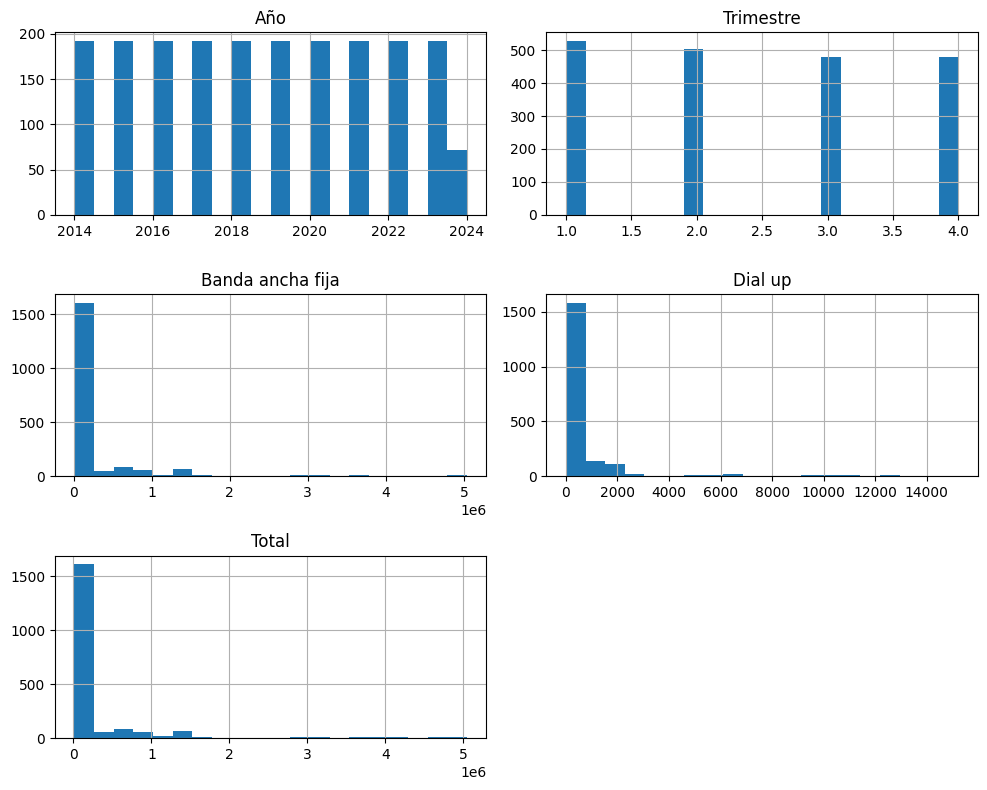

In [53]:
# 3: Estadísticas descriptivas y análisis exploratorio

# Estadísticas descriptivas para columnas numéricas y de tipo object
print("\nEstadísticas descriptivas del DataFrame (incluyendo todas las columnas):")
print(df.describe(include='all'))

# Histogramas de las columnas numéricas
df.select_dtypes(include=[np.number]).hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()


Matriz de correlación entre columnas numéricas:
                       Año  Trimestre  Banda ancha fija   Dial up     Total
Año               1.000000  -0.066355          0.089032 -0.169163  0.088348
Trimestre        -0.066355   1.000000          0.003007 -0.007771  0.002979
Banda ancha fija  0.089032   0.003007          1.000000  0.755312  0.999998
Dial up          -0.169163  -0.007771          0.755312  1.000000  0.756554
Total             0.088348   0.002979          0.999998  0.756554  1.000000


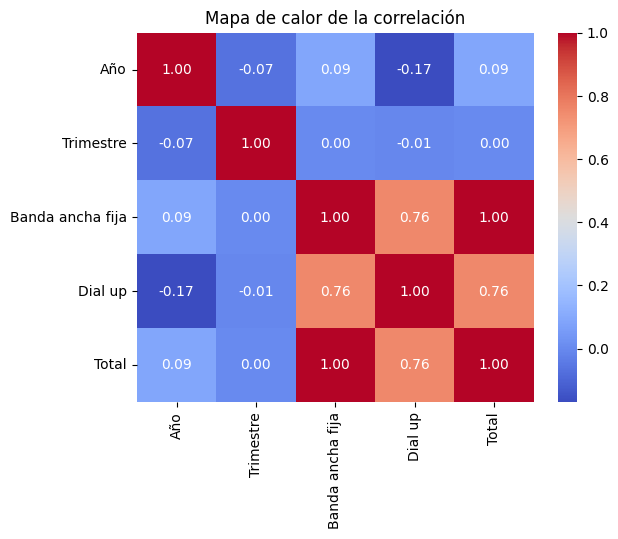

In [54]:
# Seleccionar solo las columnas numéricas
df_numerico = df.select_dtypes(include=['number'])

# Verificar si hay columnas numéricas antes de calcular la correlación
if not df_numerico.empty:
    # Calcular la matriz de correlación
    correlacion = df_numerico.corr()

    # Imprimir la matriz de correlación
    print("\nMatriz de correlación entre columnas numéricas:")
    print(correlacion)

    # Visualizar el mapa de calor de la correlación
    sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Mapa de calor de la correlación")
    plt.show()
else:
    print("\nNo hay columnas numéricas en el DataFrame para calcular la correlación.")


In [55]:
# Correlación entre columnas no numéricas usando tablas de contingencia
for col1 in df.select_dtypes(include=['object']).columns:
    for col2 in df.select_dtypes(include=['object']).columns:
        if col1 != col2:
            tabla_contingencia = pd.crosstab(df[col1], df[col2])
            print(f"Tabla de contingencia entre {col1} y {col2}:")
            print(tabla_contingencia)

Tabla de contingencia entre Provincia y Trimestre_Label:
Trimestre_Label      Q1  Q2  Q3  Q4
Provincia                          
BUENOS AIRES         22  21  20  20
CABA                 22  21  20  20
CATAMARCA            22  21  20  20
CHACO                22  21  20  20
CHUBUT               22  21  20  20
CORRIENTES           22  21  20  20
CÓRDOBA              22  21  20  20
ENTRE RÍOS           22  21  20  20
FORMOSA              22  21  20  20
JUJUY                22  21  20  20
LA PAMPA             22  21  20  20
LA RIOJA             22  21  20  20
MENDOZA              22  21  20  20
MISIONES             22  21  20  20
NEUQUÉN              22  21  20  20
RÍO NEGRO            22  21  20  20
SALTA                22  21  20  20
SAN JUAN             22  21  20  20
SAN LUIS             22  21  20  20
SANTA CRUZ           22  21  20  20
SANTA FE             22  21  20  20
SANTIAGO DEL ESTERO  22  21  20  20
TIERRA DEL FUEGO     22  21  20  20
TUCUMÁN              22  21  20  20
Tabla d

Tabla de contingencia entre Provincia y Trimestre_Label:
Trimestre_Label      Q1  Q2  Q3  Q4
Provincia                          
BUENOS AIRES         22  21  20  20
CABA                 22  21  20  20
CATAMARCA            22  21  20  20
CHACO                22  21  20  20
CHUBUT               22  21  20  20
CORRIENTES           22  21  20  20
CÓRDOBA              22  21  20  20
ENTRE RÍOS           22  21  20  20
FORMOSA              22  21  20  20
JUJUY                22  21  20  20
LA PAMPA             22  21  20  20
LA RIOJA             22  21  20  20
MENDOZA              22  21  20  20
MISIONES             22  21  20  20
NEUQUÉN              22  21  20  20
RÍO NEGRO            22  21  20  20
SALTA                22  21  20  20
SAN JUAN             22  21  20  20
SAN LUIS             22  21  20  20
SANTA CRUZ           22  21  20  20
SANTA FE             22  21  20  20
SANTIAGO DEL ESTERO  22  21  20  20
TIERRA DEL FUEGO     22  21  20  20
TUCUMÁN              22  21  20  20


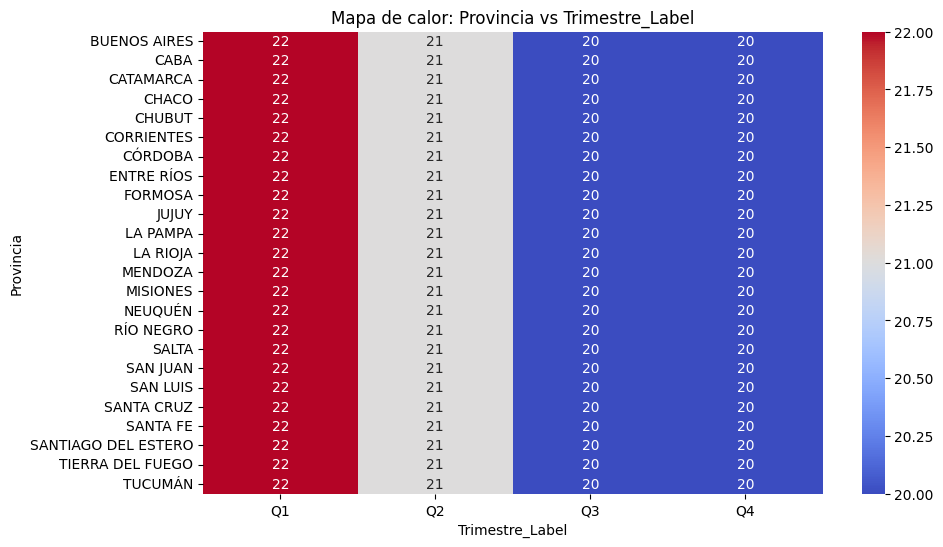

Tabla de contingencia entre Trimestre_Label y Provincia:
Provincia        BUENOS AIRES  CABA  CATAMARCA  CHACO  CHUBUT  CORRIENTES  \
Trimestre_Label                                                             
Q1                         22    22         22     22      22          22   
Q2                         21    21         21     21      21          21   
Q3                         20    20         20     20      20          20   
Q4                         20    20         20     20      20          20   

Provincia        CÓRDOBA  ENTRE RÍOS  FORMOSA  JUJUY  ...  NEUQUÉN  RÍO NEGRO  \
Trimestre_Label                                       ...                       
Q1                    22          22       22     22  ...       22         22   
Q2                    21          21       21     21  ...       21         21   
Q3                    20          20       20     20  ...       20         20   
Q4                    20          20       20     20  ...       20         

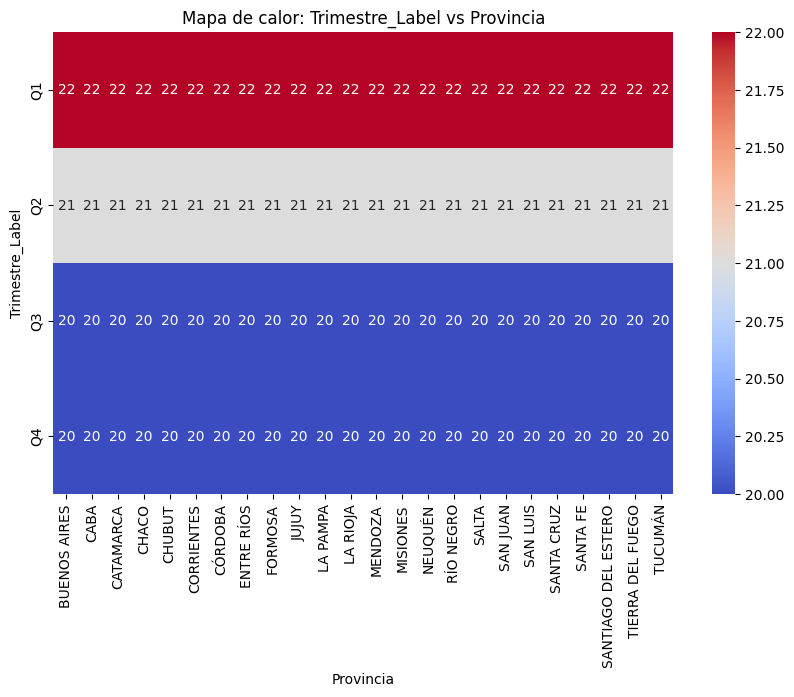

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Iterar sobre combinaciones de columnas categóricas (no numéricas)
for col1 in df.select_dtypes(include=['object']).columns:
    for col2 in df.select_dtypes(include=['object']).columns:
        if col1 != col2:  # Evitar el caso donde se compara una columna consigo misma
            # Crear tabla de contingencia
            tabla_contingencia = pd.crosstab(df[col1], df[col2])
            print(f"Tabla de contingencia entre {col1} y {col2}:")
            print(tabla_contingencia)
            
            # Visualizar la tabla como un mapa de calor
            plt.figure(figsize=(10, 6))
            sns.heatmap(tabla_contingencia, annot=True, cmap='coolwarm', fmt='d')
            plt.title(f"Mapa de calor: {col1} vs {col2}")
            plt.xlabel(col2)
            plt.ylabel(col1)
            plt.show()


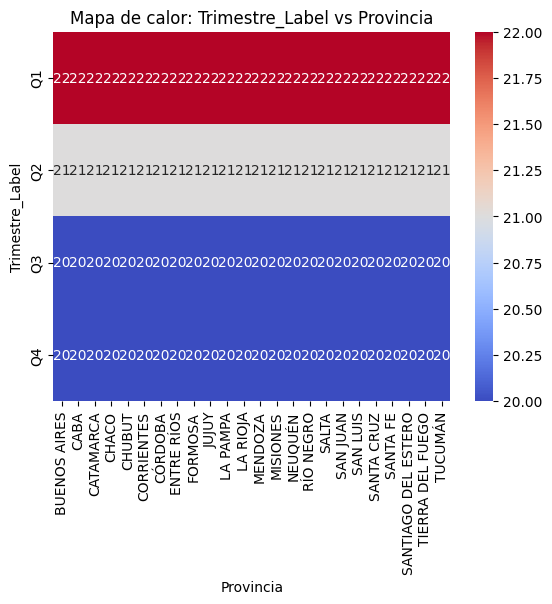

In [57]:
# Visualizar una tabla de contingencia específica como mapa de calor
tabla_contingencia = pd.crosstab(df['Trimestre_Label'], df['Provincia'])
sns.heatmap(tabla_contingencia, annot=True, cmap='coolwarm', fmt='d')
plt.title("Mapa de calor: Trimestre_Label vs Provincia")
plt.show()


In [58]:
#  6: Cálculo de Z-scores

from scipy.stats import zscore

# Calcular Z-scores para columnas numéricas
z_scores = df.select_dtypes(include=[np.number]).apply(zscore)
print("\nZ-scores de las columnas numéricas:")
print(z_scores)


Z-scores de las columnas numéricas:
           Año  Trimestre  Banda ancha fija  Dial up     Total
0     1.766513  -0.407825          5.878193      NaN  5.871680
1     1.766513  -0.407825          1.395586      NaN  1.393992
2     1.766513  -0.407825         -0.369079      NaN -0.369414
3     1.766513  -0.407825         -0.277422      NaN -0.277952
4     1.766513  -0.407825         -0.243975      NaN -0.243496
...        ...        ...               ...      ...       ...
1987 -1.565773  -1.298600         -0.431151      NaN -0.430767
1988 -1.565773  -1.298600          0.179392      NaN  0.178633
1989 -1.565773  -1.298600         -0.417380      NaN -0.417598
1990 -1.565773  -1.298600         -0.429919      NaN -0.429149
1991 -1.565773  -1.298600         -0.299241      NaN -0.299618

[1992 rows x 5 columns]


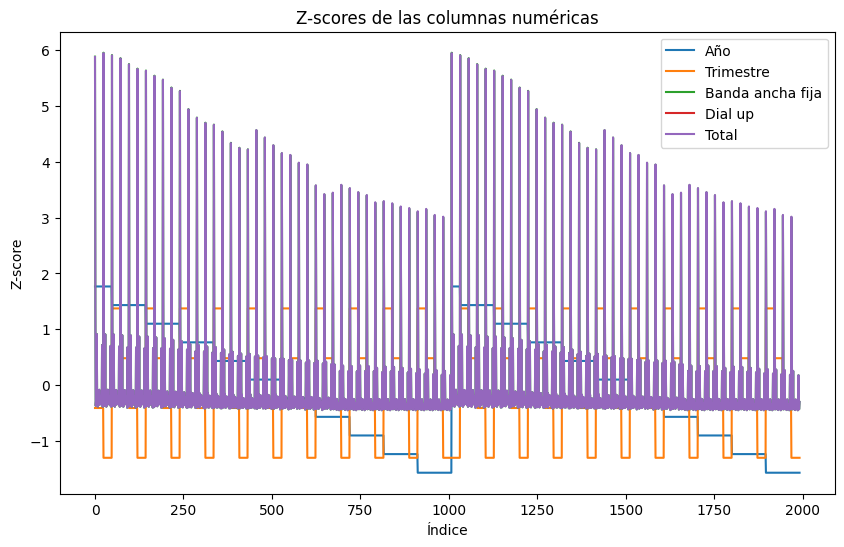

In [59]:
import matplotlib.pyplot as plt

# Graficar Z-scores de las columnas numéricas
plt.figure(figsize=(10, 6))
plt.plot(z_scores)
plt.title('Z-scores de las columnas numéricas')
plt.xlabel('Índice')
plt.ylabel('Z-score')
plt.legend(z_scores.columns)  # Para mostrar el nombre de cada columna en la leyenda
plt.show()


In [60]:
# Conteo de categorías en columnas de tipo object
for col in df.select_dtypes(include=['object']).columns:
    print(f"\nConteo de categorías en la columna '{col}':")
    print(df[col].value_counts())


Conteo de categorías en la columna 'Provincia':
Provincia
BUENOS AIRES           83
CABA                   83
CATAMARCA              83
CHACO                  83
CHUBUT                 83
CÓRDOBA                83
CORRIENTES             83
ENTRE RÍOS             83
FORMOSA                83
JUJUY                  83
LA PAMPA               83
LA RIOJA               83
MENDOZA                83
MISIONES               83
NEUQUÉN                83
RÍO NEGRO              83
SALTA                  83
SAN JUAN               83
SAN LUIS               83
SANTA CRUZ             83
SANTA FE               83
SANTIAGO DEL ESTERO    83
TIERRA DEL FUEGO       83
TUCUMÁN                83
Name: count, dtype: int64

Conteo de categorías en la columna 'Trimestre_Label':
Trimestre_Label
Q1    528
Q2    504
Q4    480
Q3    480
Name: count, dtype: int64


In [61]:
# Revisar columnas con valores negativos
columnas_negativas = df.select_dtypes(include=[np.number]).columns[df.select_dtypes(include=[np.number]).lt(0).any()]
print("\nColumnas con valores negativos:")
print(columnas_negativas)


Columnas con valores negativos:
Index([], dtype='object')


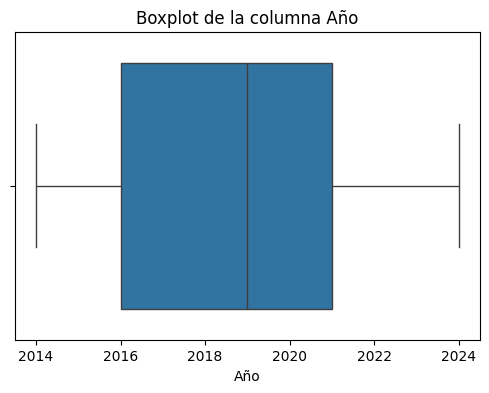

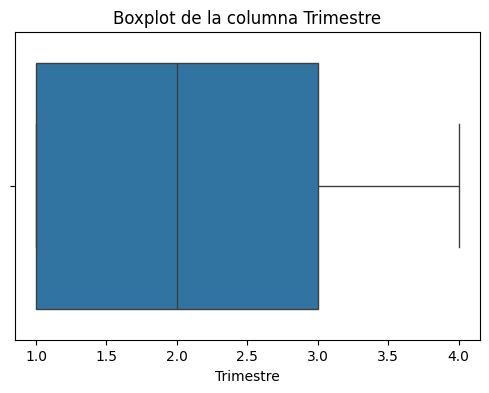

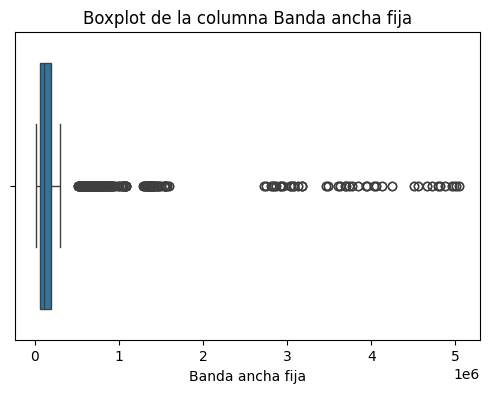

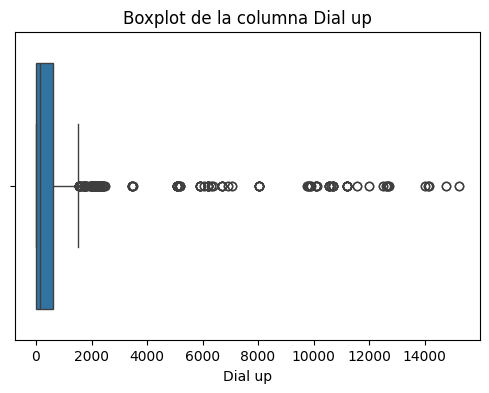

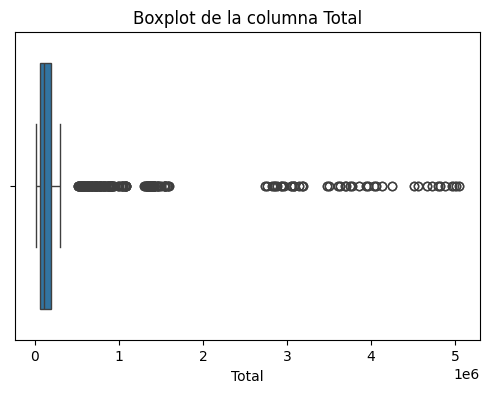

In [62]:
# Visualizar valores atípicos con un gráfico de caja
for columna in df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[columna])
    plt.title(f"Boxplot de la columna {columna}")
    plt.show()

In [63]:
# Mostrar la cantidad de valores nulos por columna
print("\nCantidad de valores nulos por columna:")
print(df.isnull().sum())


Cantidad de valores nulos por columna:
Año                 0
Trimestre           0
Provincia           0
Banda ancha fija    0
Dial up             4
Total               0
Trimestre_Label     0
dtype: int64


In [64]:
# Visualizar distribuciones de columnas con valores negativos
for columna in columnas_negativas:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[columna], kde=True, bins=20)
    plt.title(f"Distribución de la columna '{columna}' con valores negativos")
    plt.show()

In [65]:
# Contar cuántos valores negativos hay en cada columna
for columna in columnas_negativas:
    negativos = df[columna] < 0
    print(f"\nValores negativos en la columna '{columna}': {negativos.sum()}")

In [66]:
# Guardar los cambios en el mismo archivo CSV
df.to_csv(ruta_completa, index=False)
print(f"\nArchivo guardado: {ruta_completa}")


Archivo guardado: C:\Users\USUARIO\OneDrive - Secretaria de Educacion del Distrito\Escritorio\SOYhENRY\PI_21\PI_2_DA_corregido\data_internet_ind\Dial-BAf.csv


In [67]:
# 16: Análisis de distribuciones (skewness y kurtosis)

# Excluir la columna 'Año' de las columnas numéricas
df_numerico_sin_ano = df.select_dtypes(include=[np.number])

print("\nSkewness (Asimetría) de las columnas numéricas:")
print(df_numerico_sin_ano.skew())

print("\nKurtosis (Curtosis) de las columnas numéricas:")
print(df_numerico_sin_ano.kurtosis())


Skewness (Asimetría) de las columnas numéricas:
Año                 0.023509
Trimestre           0.054236
Banda ancha fija    3.866781
Dial up             3.909869
Total               3.863886
dtype: float64

Kurtosis (Curtosis) de las columnas numéricas:
Año                 -1.188340
Trimestre           -1.368402
Banda ancha fija    15.714694
Dial up             15.617471
Total               15.679363
dtype: float64


In [68]:
# 17: Verificar la existencia de multicolinealidad entre variables numéricas
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Calcular VIF para variables numéricas
X = df.select_dtypes(include=[np.number])

# Rellenar valores NaN con la media de la columna
X = X.fillna(X.mean())

X = add_constant(X)
vif = pd.DataFrame()
vif['Variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVIF (Factor de Inflación de la Varianza):")
print(vif)



VIF (Factor de Inflación de la Varianza):
           Variable           VIF
0             const  5.283687e+05
1               Año  1.167137e+00
2         Trimestre  1.006655e+00
3  Banda ancha fija  3.788902e+08
4           Dial up  3.187074e+03
5             Total  3.805524e+08


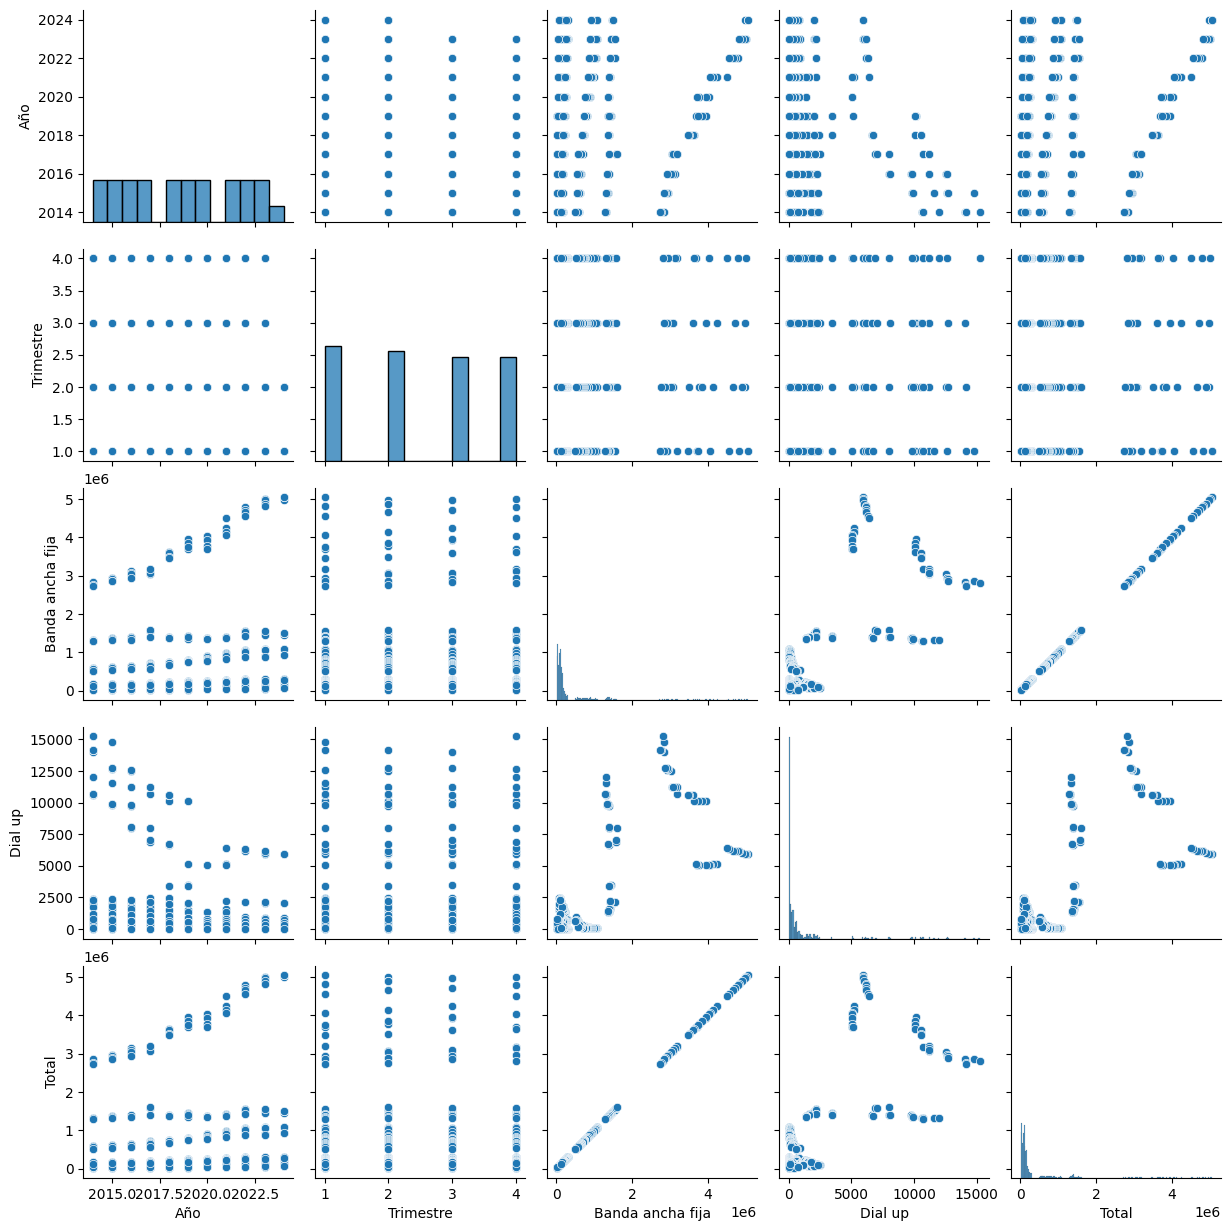

In [69]:
# 18: Visualizar la relación entre variables
sns.pairplot(df.select_dtypes(include=[np.number]))
plt.show()

In [70]:
# 19: Agrupamiento por categorías
for columna in df.select_dtypes(include=['object']).columns:
    print(f"\nEstadísticas por grupo de '{columna}':")
    print(df.groupby(columna).describe())


Estadísticas por grupo de 'Provincia':
                      Año                                                 \
                    count         mean       std     min     25%     50%   
Provincia                                                                  
BUENOS AIRES         83.0  2018.698795  3.019186  2014.0  2016.0  2019.0   
CABA                 83.0  2018.698795  3.019186  2014.0  2016.0  2019.0   
CATAMARCA            83.0  2018.698795  3.019186  2014.0  2016.0  2019.0   
CHACO                83.0  2018.698795  3.019186  2014.0  2016.0  2019.0   
CHUBUT               83.0  2018.698795  3.019186  2014.0  2016.0  2019.0   
CORRIENTES           83.0  2018.698795  3.019186  2014.0  2016.0  2019.0   
CÓRDOBA              83.0  2018.698795  3.019186  2014.0  2016.0  2019.0   
ENTRE RÍOS           83.0  2018.698795  3.019186  2014.0  2016.0  2019.0   
FORMOSA              83.0  2018.698795  3.019186  2014.0  2016.0  2019.0   
JUJUY                83.0  2018.698795  3.019186

In [71]:
# 20: Verificar duplicados

print("\nNúmero de filas duplicadas:")
print(df.duplicated().sum())


Número de filas duplicadas:
984



Estadísticas por grupo de 'Provincia':
                             Año  Trimestre  Banda ancha fija      Dial up  \
Provincia                                                                    
BUENOS AIRES         2018.698795   2.457831      3.734830e+06  9139.397590   
CABA                 2018.698795   2.457831      1.411813e+06  5266.120482   
CATAMARCA            2018.698795   2.457831      4.309888e+04     8.036145   
CHACO                2018.698795   2.457831      1.114401e+05    12.060241   
CHUBUT               2018.698795   2.457831      1.065525e+05  1439.939759   
CORRIENTES           2018.698795   2.457831      1.109045e+05    12.879518   
CÓRDOBA              2018.698795   2.457831      8.000524e+05   120.903614   
ENTRE RÍOS           2018.698795   2.457831      2.193900e+05    65.132530   
FORMOSA              2018.698795   2.457831      4.327894e+04     8.691358   
JUJUY                2018.698795   2.457831      7.642005e+04     0.843373   
LA PAMPA             201

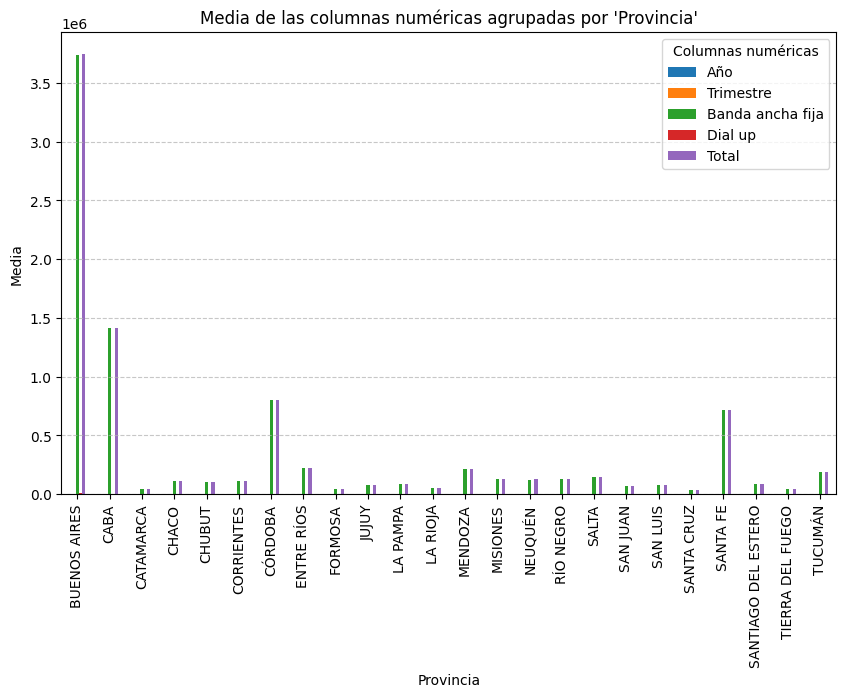


Estadísticas por grupo de 'Trimestre_Label':
                         Año  Trimestre  Banda ancha fija     Dial up  \
Trimestre_Label                                                         
Q1               2019.000000        1.0     362699.799242  913.784091   
Q2               2018.761905        2.0     363350.134921  918.258000   
Q3               2018.500000        3.0     365394.800000  912.395833   
Q4               2018.500000        4.0     369092.816667  862.137500   

                         Total  
Trimestre_Label                 
Q1               363613.583333  
Q2               364261.105159  
Q3               366307.195833  
Q4               369954.954167  


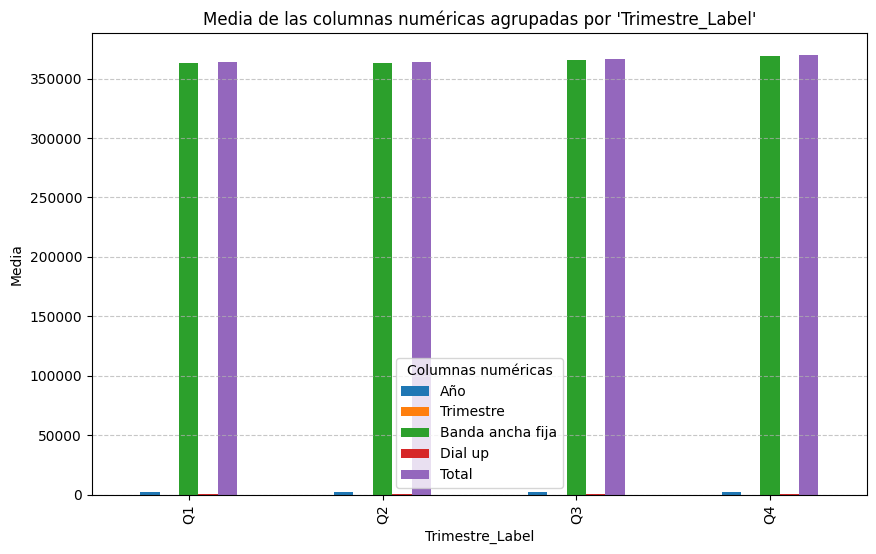

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

# Iterar sobre las columnas categóricas
for columna in df.select_dtypes(include=['object']).columns:
    # Seleccionar solo las columnas numéricas
    columnas_numericas = df.select_dtypes(include=['number']).columns
    
    # Calcular la media de las columnas numéricas agrupadas por la columna categórica
    stats_por_grupo = df.groupby(columna)[columnas_numericas].mean()
    
    print(f"\nEstadísticas por grupo de '{columna}':")
    print(stats_por_grupo)
    
    # Graficar las estadísticas
    stats_por_grupo.plot(kind='bar', figsize=(10, 6))
    plt.title(f"Media de las columnas numéricas agrupadas por '{columna}'")
    plt.xlabel(columna)
    plt.ylabel("Media")
    plt.legend(title="Columnas numéricas")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


In [73]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1992 entries, 0 to 1991
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Año               1992 non-null   int64  
 1   Trimestre         1992 non-null   int64  
 2   Provincia         1992 non-null   object 
 3   Banda ancha fija  1992 non-null   int64  
 4   Dial up           1988 non-null   float64
 5   Total             1992 non-null   int64  
 6   Trimestre_Label   1992 non-null   object 
dtypes: float64(1), int64(4), object(2)
memory usage: 109.1+ KB
None


# Análisis y Limpieza de Datos con Pandas

Este Jupyter Notebook contiene un conjunto de celdas que realizan diversas tareas de análisis y limpieza de datos utilizando la biblioteca `pandas` en Python. A continuación se describe el contenido y propósito de cada celda.

## Contenido del Notebook

1. **Cargar el archivo y normalizar los nombres**: 
    - Importa las bibliotecas necesarias.
    - Carga un archivo CSV y verifica su existencia.
    
2. **Verificar y convertir la columna "Trimestre"**:
    - Verifica si la columna "Trimestre" existe y la convierte a tipo `int64` si es necesario.

3. **Crear la columna 'Trimestre_Label'**:
    - Crea una nueva columna 'Trimestre_Label' basada en los valores de la columna 'Trimestre'.

4. **Mostrar información básica del DataFrame**:
    - Muestra información básica del DataFrame utilizando `df.info()`.

5. **Normalizar los nombres de columnas**:
    - Normaliza los nombres de las columnas 'Provincia', 'Partido' y 'Localidad'.

6. **Reemplazar variaciones específicas**:
    - Reemplaza variaciones específicas en las columnas 'Provincia', 'Partido' y 'Localidad'.

7. **Estadísticas descriptivas y análisis exploratorio**:
    - Muestra estadísticas descriptivas y visualiza histogramas de las columnas numéricas.

8. **Calcular y visualizar la matriz de correlación**:
    - Calcula y visualiza la matriz de correlación entre columnas numéricas.

9. **Correlación entre columnas no numéricas**:
    - Genera y visualiza tablas de contingencia entre columnas categóricas.

10. **Visualizar una tabla de contingencia específica**:
     - Visualiza una tabla de contingencia específica como un mapa de calor.

11. **Cálculo de Z-scores**:
     - Calcula los Z-scores para las columnas numéricas.

12. **Graficar Z-scores**:
     - Grafica los Z-scores de las columnas numéricas.

13. **Conteo de categorías en columnas de tipo object**:
     - Muestra el conteo de categorías en columnas categóricas.

14. **Revisar columnas con valores negativos**:
     - Identifica columnas con valores negativos.

15. **Visualizar valores atípicos con un gráfico de caja**:
     - Visualiza valores atípicos en columnas numéricas utilizando gráficos de caja.

16. **Mostrar la cantidad de valores nulos por columna**:
     - Muestra la cantidad de valores nulos por columna.

17. **Visualizar distribuciones de columnas con valores negativos**:
     - Visualiza distribuciones de columnas con valores negativos.

18. **Contar valores negativos en cada columna**:
     - Cuenta cuántos valores negativos hay en cada columna.

19. **Reemplazar valores negativos por NaN**:
     - Reemplaza valores negativos por NaN.

20. **Confirmar reemplazo de valores negativos por NaN**:
     - Confirma que los valores negativos han sido reemplazados por NaN.

21. **Guardar los cambios en el archivo CSV**:
     - Guarda los cambios realizados en el DataFrame en el mismo archivo CSV.

22. **Análisis de distribuciones (skewness y kurtosis)**:
     - Calcula y muestra la asimetría (skewness) y la curtosis (kurtosis) de las columnas numéricas.

23. **Verificar la existencia de multicolinealidad**:
     - Calcula el Factor de Inflación de la Varianza (VIF) para verificar la multicolinealidad entre variables numéricas.

24. **Visualizar la relación entre variables**:
     - Visualiza la relación entre variables numéricas utilizando `pairplot`.

25. **Agrupamiento por categorías**:
     - Muestra estadísticas descriptivas agrupadas por columnas categóricas.

26. **Verificar duplicados**:
     - Verifica y muestra el número de filas duplicadas en el DataFrame.

27. **Graficar estadísticas por grupo**:
     - Grafica la media de las columnas numéricas agrupadas por columnas categóricas.

## Requisitos

- Python 3.x
- Pandas
- NumPy
- Matplotlib
- Seaborn
- SciPy
- Statsmodels

## Uso

Para ejecutar este notebook, asegúrate de tener instaladas las bibliotecas necesarias y de tener el archivo CSV en la ruta especificada. Luego, ejecuta cada celda en orden para realizar el análisis y la limpieza de datos.

## Autor

Este notebook fue creado por HarryGuevara.


```markdown
## Observaciones y Conclusiones

### Observaciones

1. **Calidad de los Datos**:
    - Se encontraron y reemplazaron valores negativos en las columnas numéricas, lo cual es crucial para evitar sesgos en el análisis.
    - Se identificaron y normalizaron variaciones en los nombres de las provincias, partidos y localidades, mejorando la consistencia de los datos categóricos.

2. **Distribución de los Datos**:
    - Las distribuciones de las columnas numéricas fueron visualizadas y se calcularon los Z-scores para identificar valores atípicos.
    - Se analizaron las distribuciones de las columnas con valores negativos, proporcionando una visión clara de la naturaleza de estos datos.

3. **Correlación y Multicolinealidad**:
    - Se calcularon y visualizaron las matrices de correlación para las columnas numéricas, así como las tablas de contingencia para las columnas categóricas.
    - Se verificó la existencia de multicolinealidad entre las variables numéricas utilizando el Factor de Inflación de la Varianza (VIF).

4. **Agrupamiento y Estadísticas Descriptivas**:
    - Se realizaron agrupamientos por categorías y se calcularon estadísticas descriptivas para cada grupo, proporcionando una visión detallada de las características de cada categoría.
    - Se graficaron las medias de las columnas numéricas agrupadas por categorías, facilitando la comparación visual entre diferentes grupos.

### Conclusiones

1. **Limpieza y Preparación de Datos**:
    - La limpieza y normalización de los datos son pasos fundamentales para garantizar la calidad y consistencia de los análisis posteriores.
    - La identificación y manejo de valores atípicos y negativos son esenciales para evitar sesgos y errores en los resultados.

2. **Análisis Exploratorio**:
    - El análisis exploratorio de datos, incluyendo la visualización de distribuciones y correlaciones, proporciona una comprensión profunda de las relaciones y patrones en los datos.
    - La utilización de tablas de contingencia y mapas de calor facilita la identificación de relaciones entre variables categóricas.

3. **Importancia de la Documentación**:
    - Documentar cada paso del proceso de análisis y limpieza de datos es crucial para la reproducibilidad y comprensión del flujo de trabajo.
    - Las observaciones y conclusiones derivadas del análisis deben ser claramente comunicadas para informar decisiones basadas en datos.

Este análisis y limpieza de datos proporciona una base sólida para cualquier análisis adicional o modelado predictivo que se desee realizar en el futuro.
```